In [53]:
import numpy as np
import mlrose_hiive 
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, mean_squared_error
import itertools
import pandas as pd
import dataframe_image as dfi
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, validation_curve
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import random
import time
random.seed(42)

In [54]:
%%time

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


,Algorithm,Time
0,RHC,1.638
1,SA,0.001
2,GA,0.492
3,MIMIC,1948.321


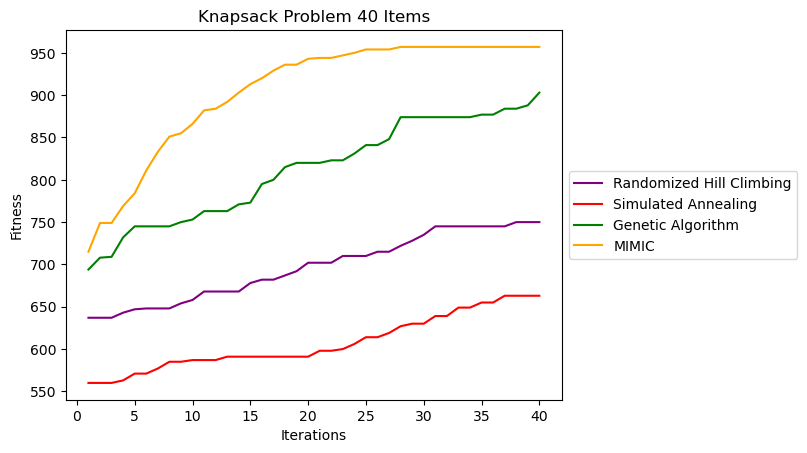

In [75]:
#Knapsack Problem
num_items = 200
weights = [random.randint(1, 20) for _ in range(num_items)]
values = [random.randint(1, 10) for _ in range(num_items)]
max_weight_pct = 0.6
fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct)
problem = mlrose_hiive.DiscreteOpt(length=len(weights), fitness_fn=fitness, maximize=True)

max_attempts = max_iters = 40

# Random Hill Climbing
#Find the best parameter
best_fitness = 0
rhc_restarts = [10, 50, 100, 200, 500, 1000]
rhc_best_parameters = {}

for param in rhc_restarts:
    rhc_state, rhc_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   restarts=param)
    if rhc_fitness > best_fitness:
        best_fitness = rhc_fitness
        rhc_best_parameters = {'restarts': param,}



start_time = time.time()
rhc_state, rhc_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   restarts=rhc_best_parameters['restarts'])
end_time = time.time()
rhc_time = end_time - start_time




# Simulated Annealing


best_fitness = 0
best_decay = None

decay_values = [0.95, 0.96, 0.97, 0.98, 0.99]
for decay in decay_values:
    sa_state, sa_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=decay, min_temp=0.001))
    if sa_fitness > best_fitness:
        best_fitness = sa_fitness
        best_decay = decay


start_time = time.time()
sa_state, sa_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                                  max_iters=max_iters,
                                                                  max_attempts=max_attempts,
                                                                  curve=True,
                                                                  random_state=42,
                                                                  schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=best_decay, min_temp=0.001))
end_time = time.time()
sa_time = end_time - start_time

# Genetic Algorithm
best_fitness = 0
best_mutation_prob = None
mutation_probs = [0.1, 0.2, 0.3, 0.4, 0.5]
for mutation_prob in mutation_probs:
    ga_state, ga_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              mutation_prob=mutation_prob)
    if ga_fitness > best_fitness:
        best_fitness = ga_fitness
        best_mutation_prob = mutation_prob


start_time = time.time()
ga_state, ga_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              mutation_prob=best_mutation_prob)
end_time = time.time()
ga_time = end_time - start_time

# # MIMIC Algorithm
best_fitness = 0
best_keep_pct = None
keep_pcts = [0.1, 0.2, 0.3, 0.4, 0.5]
for keep_pct in keep_pcts:
    mimic_state, mimic_fitness, mimic_curve = mlrose_hiive.mimic(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              keep_pct=keep_pct)
    if mimic_fitness > best_fitness:
        best_fitness = mimic_fitness
        best_keep_pct = keep_pct

start_time = time.time()
for keep_pct in keep_pcts:
    mimic_state, mimic_fitness, mimic_curve = mlrose_hiive.mimic(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              keep_pct=best_keep_pct)
end_time = time.time()
mimic_time = end_time - start_time

# Plots
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_curve[:,0], label='Randomized Hill Climbing', color='purple')
plt.plot(iterations, sa_curve[:,0], label='Simulated Annealing ', color='red')
plt.plot(iterations, ga_curve[:,0], label='Genetic Algorithm', color= 'green')
plt.plot(iterations, mimic_curve[:,0], label='MIMIC', color='orange')
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend(loc="center left",bbox_to_anchor=(1, 0.5))
plt.title("Knapsack Problem 40 Items")
plt.savefig("knapsack.png")

times = [('RHC', round(rhc_time, 3)), 
        ('SA', round(sa_time, 3)), 
        ('GA', round(ga_time, 3)), 
        ('MIMIC', round(mimic_time, 3))] 

df = pd.DataFrame(times, columns =['Algorithm', 'Time']) 
df

In [73]:
HC_fevals = rhc_curve[:,1][-1]
SA_fevals = sa_curve[:,1][-1]
GA_fevals = ga_curve[:,1][-1]

mimic_fevals = mimic_curve[:,1][-1]

Fevals = [('RHC', HC_fevals), 
        ('SA', SA_fevals), 
        ('GA', GA_fevals),
        ('MIMIC', mimic_fevals)]

df2 = pd.DataFrame(Fevals, columns =['Algorithm', 'Function Evaluations'])
df2

,Algorithm,Function Evaluations
0,RHC,113077.0
1,SA,45.0
2,GA,8248.0
3,MIMIC,8250.0


,Algorithm,Time
0,RHC,0.669
1,SA,0.001
2,GA,0.941
3,MIMIC,1300.538


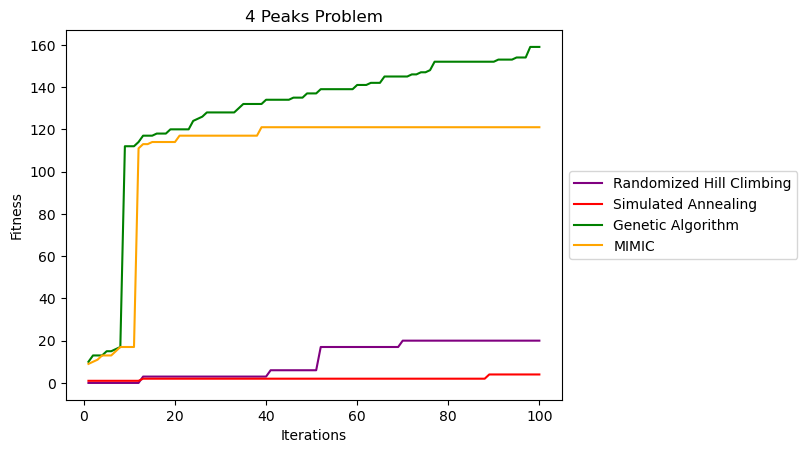

In [70]:
#Four Peaks Problem
fitness = mlrose_hiive.FourPeaks()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
max_attempts = max_iters = 100


# Random Hill Climbing
#Find the best parameter
best_fitness = 0
rhc_restarts = [10, 50, 100, 200, 500, 1000]
rhc_best_parameters = {}

for param in rhc_restarts:
    rhc_state, rhc_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   restarts=param)
    if rhc_fitness > best_fitness:
        best_fitness = rhc_fitness
        rhc_best_parameters = {'restarts': param,}



start_time = time.time()
rhc_state, rhc_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   restarts=rhc_best_parameters['restarts'])
end_time = time.time()
rhc_time = end_time - start_time




# Simulated Annealing


best_fitness = 0
best_decay = None

decay_values = [0.95, 0.96, 0.97, 0.98, 0.99]
for decay in decay_values:
    sa_state, sa_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=decay, min_temp=0.001))
    if sa_fitness > best_fitness:
        best_fitness = sa_fitness
        best_decay = decay


start_time = time.time()
sa_state, sa_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                                  max_iters=max_iters,
                                                                  max_attempts=max_attempts,
                                                                  curve=True,
                                                                  random_state=42,
                                                                  schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=best_decay, min_temp=0.001))
end_time = time.time()
sa_time = end_time - start_time

# Genetic Algorithm
best_fitness = 0
best_mutation_prob = None
mutation_probs = [0.1, 0.2, 0.3, 0.4, 0.5]
for mutation_prob in mutation_probs:
    ga_state, ga_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              mutation_prob=mutation_prob)
    if ga_fitness > best_fitness:
        best_fitness = ga_fitness
        best_mutation_prob = mutation_prob


start_time = time.time()
ga_state, ga_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              mutation_prob=best_mutation_prob)
end_time = time.time()
ga_time = end_time - start_time

# MIMIC Algorithm
best_fitness = 0
best_keep_pct = None
keep_pcts = [0.1, 0.2, 0.3, 0.4, 0.5]
for keep_pct in keep_pcts:
    mimic_state, mimic_fitness, mimic_curve = mlrose_hiive.mimic(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              keep_pct=keep_pct)
    if mimic_fitness > best_fitness:
        best_fitness = mimic_fitness
        best_keep_pct = keep_pct

start_time = time.time()
for keep_pct in keep_pcts:
    mimic_state, mimic_fitness, mimic_curve = mlrose_hiive.mimic(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              keep_pct=best_keep_pct)
end_time = time.time()
mimic_time = end_time - start_time

# Plots
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_curve[:,0], label='Randomized Hill Climbing', color='purple')
plt.plot(iterations, sa_curve[:,0], label='Simulated Annealing ', color='red')
plt.plot(iterations, ga_curve[:,0], label='Genetic Algorithm', color= 'green')
plt.plot(iterations, mimic_curve[:,0], label='MIMIC', color='orange')
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend(loc="center left",bbox_to_anchor=(1, 0.5))
plt.title("4 Peaks Problem")

times = [('RHC', round(rhc_time, 3)), 
        ('SA', round(sa_time, 3)), 
        ('GA', round(ga_time, 3)), 
        ('MIMIC', round(mimic_time, 3))] 

df = pd.DataFrame(times, columns =['Algorithm', 'Time']) 
df

In [71]:
HC_fevals = rhc_curve[:,1][-1]
SA_fevals = sa_curve[:,1][-1]
GA_fevals = ga_curve[:,1][-1]

mimic_fevals = mimic_curve[:,1][-1]

Fevals = [('RHC', HC_fevals), 
        ('SA', SA_fevals), 
        ('GA', GA_fevals),
        ('MIMIC', mimic_fevals)]

df2 = pd.DataFrame(Fevals, columns =['Algorithm', 'Function Evaluations'])
df2

,Algorithm,Function Evaluations
0,RHC,260209.0
1,SA,196.0
2,GA,20330.0
3,MIMIC,20311.0


In [74]:
#Traveling Salesman Problem 
##current 
# Parameters for Gaussian clusters
cluster_centers = [(0, 3 , 1), (0, 4, 5)] #average distance between cities is 5
num_cities = 120 # Must be divisible by len(cluster_centers)
std_deviation = 3
coords_list = []
for _ in range(num_cities):
    # Randomly choose one of the cluster centers
    cluster_center = random.choice(cluster_centers)
    
    # Generate random coordinates based on the cluster center and standard deviation
    x = np.random.normal(cluster_center[0], std_deviation)
    y = np.random.normal(cluster_center[1], std_deviation)
    coords_list.append([x, y])


problem = mlrose_hiive.TSPOpt(length = num_cities, coords = coords_list, maximize=False)

max_attempts = max_iters = 400
# Random Hill Climbing
#Find the best parameter
best_fitness = 10000000000
rhc_restarts = [10, 50, 100, 200, 500, 1000]
best_restarts = None
rhc_best_parameter = None

for param in rhc_restarts:
    rhc_state, rhc_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   restarts=param)
    if rhc_fitness < best_fitness:
        best_fitness = rhc_fitness
        rhc_best_parameter = param



start_time = time.time()
rhc_state, rhc_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   restarts=rhc_best_parameter)
end_time = time.time()
rhc_time = end_time - start_time




# Simulated Annealing


best_fitness = 10000000000
best_decay = None

decay_values = [0.95, 0.96, 0.97, 0.98,.985, 0.99,.995,.999]
for decay in decay_values:
    sa_state, sa_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   schedule=mlrose_hiive.GeomDecay(init_temp = 10, decay=decay, min_temp=0.01))
    if sa_fitness < best_fitness:
        best_fitness = sa_fitness
        best_decay = decay


start_time = time.time()
sa_state, sa_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                                  max_iters=max_iters,
                                                                  max_attempts=max_attempts,
                                                                  curve=True,
                                                                  random_state=42,
                                                                  schedule=mlrose_hiive.GeomDecay(init_temp = 10, decay=best_decay, min_temp=0.01))
end_time = time.time()
sa_time = end_time - start_time

# Genetic Algorithm
best_fitness = 10000000000
best_mutation_prob = None
mutation_probs = [0.1, 0.2, 0.3, 0.4, 0.5]
for mutation_prob in mutation_probs:
    ga_state, ga_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              mutation_prob=mutation_prob)
    if ga_fitness < best_fitness:
        best_fitness = ga_fitness
        best_mutation_prob = mutation_prob


start_time = time.time()
ga_state, ga_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              mutation_prob=best_mutation_prob)
end_time = time.time()
ga_time = end_time - start_time

# MIMIC Algorithm
# best_fitness = 10000000000
# best_keep_pct = None
# keep_pcts = [.3,0.5,.6]
# for keep_pct in keep_pcts:
#     mimic_state, mimic_fitness, mimic_curve = mlrose_hiive.mimic(problem,
#                                                               max_iters=max_iters,
#                                                               max_attempts=max_attempts,
#                                                               curve=True,
#                                                               random_state=42,
#                                                               keep_pct=keep_pct)
#     if mimic_fitness < best_fitness:
#         best_fitness = mimic_fitness
#         best_keep_pct = keep_pct

start_time = time.time()
for keep_pct in keep_pcts:
    mimic_state, mimic_fitness, mimic_curve = mlrose_hiive.mimic(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              keep_pct=best_keep_pct)
end_time = time.time()
mimic_time = end_time - start_time

# Plots
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_curve[:,0], label='Randomized Hill Climbing', color='purple')
plt.plot(iterations, sa_curve[:,0], label='Simulated Annealing ', color='red')
plt.plot(iterations, ga_curve[:,0], label='Genetic Algorithm', color= 'green')
plt.plot(iterations, mimic_curve[:,0], label='MIMIC', color='orange')
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend(loc="center left",bbox_to_anchor=(1, 0.5))
plt.title("Traveling Salesman Problem")

times = [('RHC', round(rhc_time, 3)), 
        ('SA', round(sa_time, 3)), 
        ('GA', round(ga_time, 3)), 
        ('MIMIC', round(mimic_time, 3))] 

df = pd.DataFrame(times, columns =['Algorithm', 'Time']) 
df

KeyboardInterrupt: 

In [ ]:
HC_fevals = rhc_curve[:,1][-1]
SA_fevals = sa_curve[:,1][-1]
GA_fevals = ga_curve[:,1][-1]

mimic_fevals = mimic_curve[:,1][-1]

Fevals = [('RHC', HC_fevals), 
        ('SA', SA_fevals), 
        ('GA', GA_fevals),
        ('MIMIC', mimic_fevals)]

df2 = pd.DataFrame(Fevals, columns =['Algorithm', 'Function Evaluations'])
df2

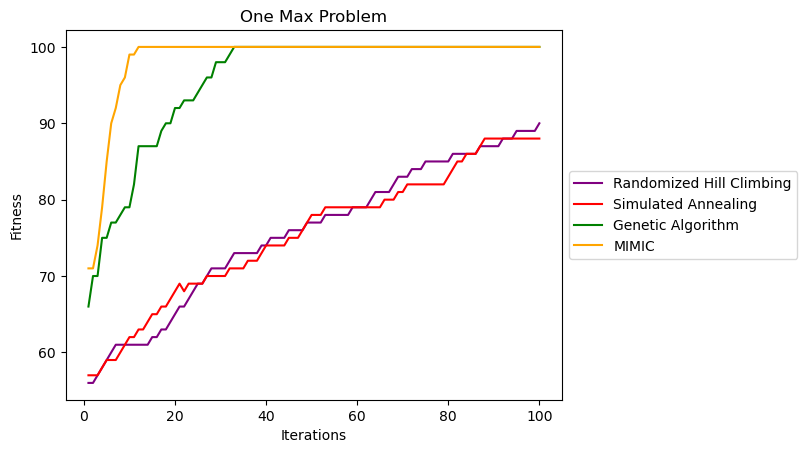

In [ ]:
#Count Ones
fitness = fitness = mlrose_hiive.OneMax()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
max_attempts = max_iters = 5


max_attempts = max_iters = 100
# Random Hill Climbing
#Find the best parameter
best_fitness = 0
rhc_restarts = [10, 50, 100, 200, 500, 1000]
rhc_best_parameters = {}

for param in rhc_restarts:
    rhc_state, rhc_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   restarts=param)
    if rhc_fitness > best_fitness:
        best_fitness = rhc_fitness
        rhc_best_parameters = {'restarts': param,}



start_time = time.time()
rhc_state, rhc_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   restarts=rhc_best_parameters['restarts'])
end_time = time.time()
rhc_time = end_time - start_time




# Simulated Annealing


best_fitness = 0
best_decay = None

decay_values = [0.95, 0.96, 0.97, 0.98, 0.99]
for decay in decay_values:
    sa_state, sa_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                                   max_iters=max_iters,
                                                                   max_attempts=max_attempts,
                                                                   curve=True,
                                                                   random_state=42,
                                                                   schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=decay, min_temp=0.001))
    if sa_fitness > best_fitness:
        best_fitness = sa_fitness
        best_decay = decay


start_time = time.time()
sa_state, sa_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                                  max_iters=max_iters,
                                                                  max_attempts=max_attempts,
                                                                  curve=True,
                                                                  random_state=42,
                                                                  schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=best_decay, min_temp=0.001))
end_time = time.time()
sa_time = end_time - start_time

# Genetic Algorithm
best_fitness = 0
best_mutation_prob = None
mutation_probs = [0.1, 0.2, 0.3, 0.4, 0.5]
for mutation_prob in mutation_probs:
    ga_state, ga_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              mutation_prob=mutation_prob)
    if ga_fitness > best_fitness:
        best_fitness = ga_fitness
        best_mutation_prob = mutation_prob


start_time = time.time()
ga_state, ga_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              mutation_prob=best_mutation_prob)
end_time = time.time()
ga_time = end_time - start_time

# MIMIC Algorithm
best_fitness = 0
best_keep_pct = None
keep_pcts = [0.1, 0.2, 0.3, 0.4, 0.5]
for keep_pct in keep_pcts:
    mimic_state, mimic_fitness, mimic_curve = mlrose_hiive.mimic(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              keep_pct=keep_pct)
    if mimic_fitness > best_fitness:
        best_fitness = mimic_fitness
        best_keep_pct = keep_pct

start_time = time.time()
for keep_pct in keep_pcts:
    mimic_state, mimic_fitness, mimic_curve = mlrose_hiive.mimic(problem,
                                                              max_iters=max_iters,
                                                              max_attempts=max_attempts,
                                                              curve=True,
                                                              random_state=42,
                                                              keep_pct=best_keep_pct)
end_time = time.time()
mimic_time = end_time - start_time

# Plots
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_curve[:,0], label='Randomized Hill Climbing', color='purple')
plt.plot(iterations, sa_curve[:,0], label='Simulated Annealing ', color='red')
plt.plot(iterations, ga_curve[:,0], label='Genetic Algorithm', color= 'green')
plt.plot(iterations, mimic_curve[:,0], label='MIMIC', color='orange')
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.legend(loc="center left",bbox_to_anchor=(1, 0.5))
plt.title("One Max Problem")

times = [('RHC', round(rhc_time, 3)), 
        ('SA', round(sa_time, 3)), 
        ('GA', round(ga_time, 3)), 
        ('MIMIC', round(mimic_time, 3))] 

df = pd.DataFrame(times, columns =['Algorithm', 'Time'])
df

In [ ]:
HC_fevals = rhc_curve[:,1][-1]
SA_fevals = sa_curve[:,1][-1]
GA_fevals = ga_curve[:,1][-1]

mimic_fevals = mimic_curve[:,1][-1]

Fevals = [('RHC', HC_fevals), 
        ('SA', SA_fevals), 
        ('GA', GA_fevals),
        ('MIMIC', mimic_fevals)]

df2 = pd.DataFrame(Fevals, columns =['Algorithm', 'Function Evaluations'])
df2